<a href="https://colab.research.google.com/github/Payal2000/Crash-Course-in-Causality-Written-Section-Payal-Nagaonkar/blob/main/Crash_Course_in_Causality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **NUID: 002772260**

### **Abstract**
This study investigates the influence of posting frequency on user engagement on Instagram, leveraging a comprehensive dataset sourced from Kaggle. By examining key engagement metrics such as likes, comments, shares, and profile visits across various posting frequencies, the research aims to uncover actionable insights that inform effective content strategies. Employing statistical analysis and causal inference techniques, the study explores the interplay between post frequency and audience interaction, accounting for factors such as content quality, optimal posting times, and audience demographics. The findings provide evidence-based recommendations for maximizing user engagement through strategic posting, contributing to the field of social media marketing. By addressing the dynamic relationship between content distribution and audience behavior, this research offers valuable guidance to marketers and content creators seeking to enhance their impact on platforms like Instagram.

### **What is Causality?**
Causality is a concept that explains the relationship between a cause and an effect. In essence, causality identifies how one event, process, state, or object (the cause) contributes to producing another event, process, state, or object (the effect). The defining characteristic of causality is that the cause is at least partly responsible for the effect, while the effect is at least partly dependent on the cause. This principle forms the basis for understanding why events or processes occur, as the cause provides the reason or explanation for the observed outcome.


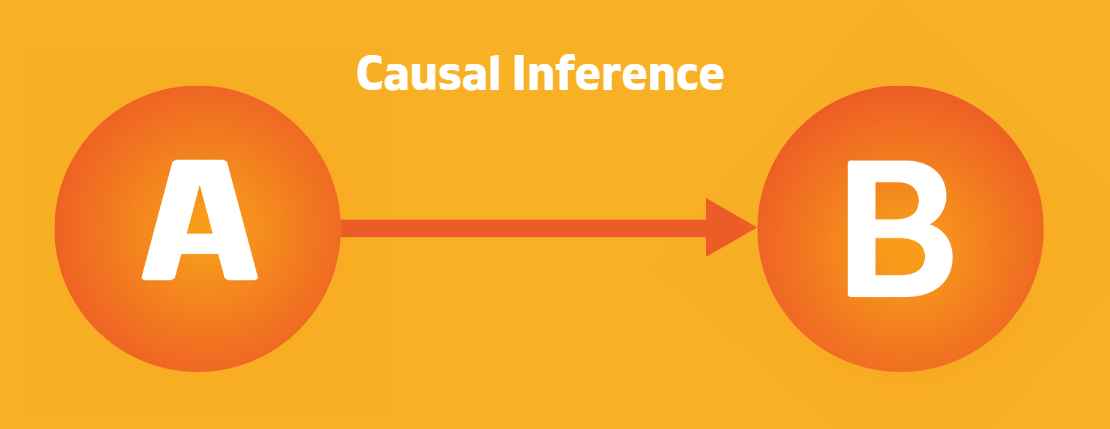

Causality is the relationship between cause and effect. It seeks to explain how one event (the cause) leads to or influences another event (the effect). Unlike correlation, which only shows a statistical association between variables, causality focuses on understanding whether and how one variable directly impacts another.

### **Introduction to Causality in Machine Learning**
Causality in machine learning focuses on understanding the cause-and-effect relationships between variables, moving beyond mere prediction or correlation. While traditional machine learning models excel at identifying patterns and associations in data, they often fall short in explaining why these patterns occur. Causality bridges this gap by enabling models to reason about interventions, counterfactuals, and the underlying mechanisms driving observed outcomes.


In [9]:
!pip install eli5

In [7]:
#Loading the required libraries
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")

### **Importing Dataset**

In [17]:
import pandas as pd

file_url = 'https://github.com/Payal2000/Crash-Course-in-Causality-Written-Section-Payal-Nagaonkar/raw/refs/heads/main/Instagram_data.csv'

# Attempt reading with a different encoding
try:
    data = pd.read_csv(file_url, encoding='latin1')  # 'latin1' often works for such cases
    print(data.head())
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")


   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

### **Data Preprocessing**


In [19]:
## Reading first 5 rows
data.head(5)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [20]:
data.columns.tolist()

['Impressions',
 'From Home',
 'From Hashtags',
 'From Explore',
 'From Other',
 'Saves',
 'Comments',
 'Shares',
 'Likes',
 'Profile Visits',
 'Follows',
 'Caption',
 'Hashtags']

### **Columns Overview**

1. Impressions:
   - The total number of times a post was viewed, representing its overall reach across all sources.

2. From Home:
   - Impressions originating from the user's home feed. This primarily reflects engagement from followers.

3. From Hashtags:
   - Views generated through hashtags, offering insights into the effectiveness of hashtag usage for discovery.

4. From Explore:
   - Impressions derived from the Explore page, indicative of how well a post resonates with broader audiences.

5. From Other:
   - Views from other, less defined sources, such as shared links or external embeds.

6. Saves:
   - The number of times a post was saved for later reference, reflecting the value users find in the content.

7. Comments:
   - The count of comments on a post, showcasing direct user interaction.

8. Shares:
   - How many times the post was shared with others, highlighting its shareability.

9. Likes:
   - The total number of likes, a straightforward indicator of user appreciation.

10. Profile Visits:
    - The number of times users visited the profile after engaging with the post, showing its impact on audience curiosity.

11. Follows:
    - New followers gained as a direct result of the post, reflecting its effectiveness in growing the audience.

12. Caption:
    - The text accompanying the post, including descriptions, calls-to-action, or hashtags.

13. Hashtags:
    - The hashtags used in the post to increase discoverability among non-followers.

In [21]:
# Calculate the number of hashtags for each post
data['Hashtag Count'] = data['Hashtags'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

# Display the distribution of hashtag counts to understand the data better
hashtag_count_distribution = data['Hashtag Count'].describe()

# Output the distribution
print("Hashtag Count Distribution:")
print(hashtag_count_distribution)


Hashtag Count Distribution:
count    119.000000
mean      18.966387
std        4.848436
min       10.000000
25%       17.000000
50%       18.000000
75%       21.000000
max       30.000000
Name: Hashtag Count, dtype: float64


### **Hashtag Count Distribution Analysis**

The following statistics summarize the number of hashtags used in the posts:

| Statistic      | Value        | Explanation                                                                 |
|----------------|--------------|-----------------------------------------------------------------------------|
| **Count**      | 119          | The total number of posts with hashtag data in the dataset.                |
| **Mean**       | 18.97        | On average, each post contains approximately 19 hashtags.                  |
| **Std (Standard Deviation)** | 4.85         | There is moderate variability in the number of hashtags used per post. |
| **Min**        | 10           | The minimum number of hashtags in a post is 10.                            |
| **25% (1st Quartile)** | 17   | 25% of the posts have 17 or fewer hashtags.                                 |
| **Median (50%)** | 18         | The median number of hashtags is 18, meaning half the posts have 18 or fewer hashtags. |
| **75% (3rd Quartile)** | 21   | 75% of the posts have 21 or fewer hashtags.                                 |
| **Max**        | 30           | The maximum number of hashtags in a single post is 30.                     |


### **Insights**
1. The average number of hashtags (`Mean`) is close to the median, indicating the data is relatively symmetric.
2. Most posts use between 17 and 21 hashtags (interquartile range: 25% to 75%).
3. The minimum number of hashtags is 10, while the maximum is 30, showing that all posts heavily utilize hashtags to increase visibility.
4. A standard deviation of 4.85 suggests moderate variability in hashtag usage across posts.

This analysis highlights that posts in the dataset rely heavily on hashtags, with a typical range of 17 to 21 hashtags per post.


In [22]:
# Basic statistics for Likes, Comments, Shares, and Hashtag Count
basic_stats = data[['Likes', 'Comments', 'Shares', 'Hashtag Count']].describe()

# Display the basic statistics
print("Basic Statistics for Likes, Comments, Shares, and Hashtag Count:")
print(basic_stats)


Basic Statistics for Likes, Comments, Shares, and Hashtag Count:
            Likes    Comments      Shares  Hashtag Count
count  119.000000  119.000000  119.000000     119.000000
mean   173.781513    6.663866    9.361345      18.966387
std     82.378947    3.544576   10.089205       4.848436
min     72.000000    0.000000    0.000000      10.000000
25%    121.500000    4.000000    3.000000      17.000000
50%    151.000000    6.000000    6.000000      18.000000
75%    204.000000    8.000000   13.500000      21.000000
max    549.000000   19.000000   75.000000      30.000000


### **Basic Statistics for Likes, Comments, Shares, and Hashtag Count**

The table below summarizes the key statistics for the `Likes`, `Comments`, `Shares`, and `Hashtag Count` columns:

| Statistic       | Likes       | Comments    | Shares      | Hashtag Count |
|------------------|-------------|-------------|-------------|---------------|
| **Count**       | 119         | 119         | 119         | 119           |
| **Mean**        | 173.78      | 6.66        | 9.36        | 18.97         |
| **Std (Standard Deviation)** | 82.38      | 3.54        | 10.09       | 4.85          |
| **Min**         | 72          | 0           | 0           | 10            |
| **25% (1st Quartile)** | 121.5       | 4           | 3           | 17            |
| **Median (50%)**| 151         | 6           | 6           | 18            |
| **75% (3rd Quartile)** | 204        | 8           | 13.5        | 21            |
| **Max**         | 549         | 19          | 75          | 30            |

---

### **Insights**

#### **1. Likes**
- The average number of likes (`Mean`) is **173.78**, with a standard deviation of **82.38**.
- Posts receive anywhere from **72 likes (Min)** to **549 likes (Max)**, indicating significant variability.
- The median is **151 likes**, meaning half of the posts receive this number of likes or fewer.

#### **2. Comments**
- On average, posts have **6.66 comments**, with a range from **0 comments (Min)** to **19 comments (Max)**.
- Most posts cluster around **4 comments (25%) to 8 comments (75%)**, with a moderate standard deviation of **3.54**.

#### **3. Shares**
- Posts are shared an average of **9.36 times**, with notable variability (standard deviation: **10.09**).
- Shares range from **0 (Min)** to **75 (Max)**, with a median of **6 shares**.

#### **4. Hashtag Count**
- The average post uses **18.97 hashtags**, with a standard deviation of **4.85**.
- Posts use between **10 (Min)** and **30 (Max)** hashtags, with most posts having **17 (25%) to 21 (75%)** hashtags.

---

### **Key Takeaways**
1. **Likes**: High variability in likes suggests some posts significantly outperform others.
2. **Comments**: Comments show a narrower range, with most posts receiving 4–8 comments.
3. **Shares**: Shares have a wide range, suggesting some posts resonate strongly enough to be widely shared.
4. **Hashtag Count**: Posts consistently utilize many hashtags, likely as a strategy to increase visibility.

This analysis highlights differences in engagement metrics and provides a basis for further exploration of what factors drive higher likes, comments, and shares.


### **Interpretation of the Average Number of Hashtags per Post**


In [23]:
# Calculate the average number of hashtags per post
average_hashtags = data['Hashtag Count'].mean()

# Display the result
print("Average Number of Hashtags per Post:", average_hashtags)


Average Number of Hashtags per Post: 18.96638655462185


The average number of hashtags per post is approximately 18.97. This indicates that posts in your dataset heavily utilize hashtags, likely as a strategy to maximize their reach and engagement.

In [24]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
Hashtag Count     0
dtype: int64


### **Missing Values in Each Column**

When the dataset was analyzed for missing values, the results show that there are no missing values in any column.

---

| Column            | Missing Values | Explanation                                                                            |
|--------------------|----------------|----------------------------------------------------------------------------------------|
| **Impressions**    | 0              | All posts have valid data for the total number of impressions.                        |
| **From Home**      | 0              | No missing values in impressions from the home feed.                                  |
| **From Hashtags**  | 0              | All posts have valid data for impressions from hashtags.                              |
| **From Explore**   | 0              | No missing values in impressions from the Explore page.                               |
| **From Other**     | 0              | All other sources of impressions are accounted for.                                   |
| **Saves**          | 0              | All posts have data on the number of times they were saved by users.                  |
| **Comments**       | 0              | The dataset contains complete data for the number of comments on each post.           |
| **Shares**         | 0              | All posts have valid data for the number of shares.                                   |
| **Likes**          | 0              | There are no missing values in the likes column.                                      |
| **Profile Visits** | 0              | Every post has data for the number of profile visits generated.                       |
| **Follows**        | 0              | The dataset contains complete data on the number of new followers gained.             |
| **Caption**        | 0              | No missing values in the captions accompanying each post.                             |
| **Hashtags**       | 0              | All posts have valid data for the hashtags used.                                      |
| **Hashtag Count**  | 0              | The calculated number of hashtags per post has no missing values.                     |

---

### **Key Takeaways**
1. **Data Completeness**:
   - The dataset is fully complete with no missing values across all columns. This ensures reliable analysis without needing to handle or impute missing data.

2. **Ready for Analysis**:
   - Since there are no missing values, the dataset is well-prepared for further analysis, including statistical exploration and causal inference studies.

This clean dataset provides a strong foundation for generating actionable insights without additional preprocessing.
